IMPORT LIBRARY

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from collections import Counter
import joblib

BASE URLS

In [3]:
base_urls = [
    {
        'url': 'https://link.springer.com/search?new-search=true&query=audio+processing&content-type=article&date=custom&dateFrom=2019&dateTo=2024&language=En&sortBy=relevance',
        'topik': 'Audio Processing'
    },
    {
        'url': 'https://link.springer.com/search?new-search=true&query=video+processing&content-type=article&date=custom&dateFrom=2019&dateTo=2024&language=En&sortBy=relevance',
        'topik': 'Video Processing'
    },
    {
        'url': 'https://link.springer.com/search?new-search=true&query=signal+processing&content-type=article&date=custom&dateFrom=2019&dateTo=2024&language=En&sortBy=relevance',
        'topik': 'Signal Processing'
    },
      {
        'url': 'https://link.springer.com/search?new-search=true&query=image+processing&content-type=article&date=custom&dateFrom=2019&dateTo=2024&language=En&sortBy=relevance',
        'topik': 'Image Processing'
    },
    {
        'url': 'https://link.springer.com/search?new-search=true&query=text+processing&content-type=article&date=custom&dateFrom=2019&dateTo=2024&language=En&sortBy=relevance',
        'topik': 'Text Processing'
    }
]

SCRAPING DATA SESUAI JUMLAH TOPIK

scraping berdasarkan presentase keseluruhan jumlah topik dalam setiap tahun

In [4]:
# MENGHITUNG JUMLAH ARTIKEL YANG MAU DISCRAPING BUAT TIAP TOPIK

topik_counts = {}

for base in base_urls:
    topik = base['topik']
    url = base['url']

    # Ambil total artikel dari Springer
    print(f"\nScraping total artikel untuk topik: {topik}")
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")

    # Cari total hasil pencarian
    total_results_text = soup.find("span", class_="u-display-flex")
    if total_results_text:
        match = re.search(r'of\s([\d,]+)\sresults', total_results_text.text)
        if match:
            total_results = int(match.group(1).replace(',', ''))
        else:
            total_results = 0
    else:
        total_results = 0

    print(f"Total artikel ditemukan: {total_results}")
    topik_counts[topik] = total_results

    # Hitung 10% dari total artikel
    sample_size = math.ceil(0.001 * total_results)
    print(f"Mengambil sampel 0,1%: {sample_size} artikel")

    # Tentukan jumlah halaman yang akan di-scrape
    articles_per_page = 20
    total_pages = math.ceil(sample_size / articles_per_page)
    print(f"Scraping {total_pages} halaman untuk topik {topik}")

    


Scraping total artikel untuk topik: Audio Processing
Total artikel ditemukan: 21194
Mengambil sampel 0,1%: 22 artikel
Scraping 2 halaman untuk topik Audio Processing

Scraping total artikel untuk topik: Video Processing
Total artikel ditemukan: 60754
Mengambil sampel 0,1%: 61 artikel
Scraping 4 halaman untuk topik Video Processing

Scraping total artikel untuk topik: Signal Processing
Total artikel ditemukan: 208977
Mengambil sampel 0,1%: 209 artikel
Scraping 11 halaman untuk topik Signal Processing

Scraping total artikel untuk topik: Image Processing
Total artikel ditemukan: 230482
Mengambil sampel 0,1%: 231 artikel
Scraping 12 halaman untuk topik Image Processing

Scraping total artikel untuk topik: Text Processing
Total artikel ditemukan: 220436
Mengambil sampel 0,1%: 221 artikel
Scraping 12 halaman untuk topik Text Processing


In [ ]:
# SCRAPING BERDASARKAN JUMLAH ARTIKEL UNTUK MENGGAMBARKAN DISTRIBUSINY

import requests
from bs4 import BeautifulSoup
import re
import math
import time
import pandas as pd

data = []

for base in base_urls:
    topik = base['topik']
    url = base['url']

    print(f"\nScraping total artikel untuk topik: {topik}")
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")

    total_results_text = soup.find("span", class_="u-display-flex")
    if total_results_text:
        match = re.search(r'of\s([\d,]+)\sresults', total_results_text.text)
        if match:
            total_results = int(match.group(1).replace(',', ''))
        else:
            total_results = 0
    else:
        total_results = 0

    print(f"Total artikel ditemukan: {total_results}")

    sample_size = math.ceil(0.001 * total_results)
    print(f"Mengambil sampel 0,1%: {sample_size} artikel")

    articles_per_page = 20
    total_pages = math.ceil(sample_size / articles_per_page)
    print(f"Scraping {total_pages} halaman untuk topik {topik}")

    for page in range(1, total_pages + 1):
        print(f"Scraping halaman {page} untuk topik {topik}...")

        page_url = f"{url}&page={page}"
        html = requests.get(page_url)
        soup = BeautifulSoup(html.text, "html.parser")

        articles = soup.find_all("div", class_="app-card-open__main")

        for article in articles:
            title_tag = article.find("a", class_="app-card-open__link")
            if title_tag:
                title = title_tag.text.strip()

                date_tag = article.find("span", class_="c-meta__item", attrs={"data-test": "published"})
                if date_tag:
                    year = date_tag.text.strip().split()[-1]
                else:
                    year = "Tahun tidak ditemukan"

                abstract_tag = article.find("div", {"data-test": "abstract"}) or \
                               article.find("div", class_="Abstract") or \
                               article.find("div", class_="c-article-section__content")

                abstract = abstract_tag.text.strip() if abstract_tag else "N/A"

                data.append({
                    "Topik": topik,
                    "Judul": title,
                    "Tahun Terbit": year,
                    "Abstrak": abstract
                })

                time.sleep(1)

    df = pd.DataFrame(data)
    print(f"\nScraping selesai untuk topik: {topik}")
    print(f"Total artikel yang di-scrape untuk {topik}: {len(data)}")

df.to_csv('scraping_totalpages.csv', index=False, encoding='utf-8')


In [9]:
df = pd.read_csv('scraping_totalpages.csv')
df

,Topik,Judul,Tahun Terbit,Abstrak
0,Audio Processing,A lightweight approach to real-time speaker di...,2024,This manuscript deals with the task of real-ti...
1,Audio Processing,MFCC in audio signal processing for voice diso...,2024,Voice Disorder or Dysphonia has caught the att...
2,Audio Processing,Diagnosis of Parkinson's Disease Using Convolu...,2024,This study proposes a new method for diagnosin...
3,Audio Processing,The Effect of Playback Speed and Distractions ...,2024,"In the modern age, we often consume content at..."
4,Audio Processing,Audio-Visual Interactions during Emotion Proce...,2022,Despite the growing number of bicultural bilin...
...,...,...,...,...
795,Text Processing,What Do Text-to-Image Models Know About the La...,2024,Text-to-image models use user-generated prompt...
796,Text Processing,Phrase-level emotion intensity detection of te...,2024,Emotions have a significant impact on how peop...
797,Text Processing,KPLLM-STE: Knowledge-enhanced and prompt-aware...,2024,Short-text Expansion plays a significant role ...
798,Text Processing,Detecting textual adversarial examples through...,2023,"In this paper, we propose a method for detecti..."


In [10]:
# PREPROCESSING 

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str): 
        text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words] 
    tokens = [lemmatizer.lemmatize(word) for word in tokens] 
    return ' '.join(tokens), tokens

df = pd.DataFrame(df, columns=['Topik', 'Judul', 'Tahun Terbit', 'Abstrak'])

df['Preprocessing Judul'] = df['Judul'].apply(lambda x: preprocess_text(x)[0])
df['Preprocessing Abstrak'] = df['Abstrak'].apply(lambda x: preprocess_text(x)[0] if x != "N/A" else "N/A")

df.to_csv('hasil_preprocessing.csv', index=False, encoding='utf-8')
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IVANAGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IVANAGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              Topik                                              Judul  \
0  Audio Processing  A lightweight approach to real-time speaker di...   
1  Audio Processing  MFCC in audio signal processing for voice diso...   
2  Audio Processing  Diagnosis of Parkinson's Disease Using Convolu...   
3  Audio Processing  The Effect of Playback Speed and Distractions ...   
4  Audio Processing  Audio-Visual Interactions during Emotion Proce...   

   Tahun Terbit                                            Abstrak  \
0          2024  This manuscript deals with the task of real-ti...   
1          2024  Voice Disorder or Dysphonia has caught the att...   
2          2024  This study proposes a new method for diagnosin...   
3          2024  In the modern age, we often consume content at...   
4          2022  Despite the growing number of bicultural bilin...   

                                 Preprocessing Judul  \
0  lightweight approach realtime speaker diarizat...   
1  mfcc audio signal p

In [11]:
# FEATURE ENGINEERING

df['Document'] = (
    df['Preprocessing Judul'].fillna('') + ' ' + 
    df['Preprocessing Abstrak'].fillna('')
)

# ONE-HOT Encoding
one_hot_vectorizer = CountVectorizer(binary=True) 
X_one_hot = one_hot_vectorizer.fit_transform(df['Document'])
X_one_hot_df = pd.DataFrame(X_one_hot.toarray(), columns=one_hot_vectorizer.get_feature_names_out())

# BoW 
bow_vectorizer = CountVectorizer() 
X_bow = bow_vectorizer.fit_transform(df['Document'])
X_bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# TF-IDF 
tfidf_vectorizer = TfidfVectorizer() 
X_tfidf = tfidf_vectorizer.fit_transform(df['Document'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# GABUNGAN 
X_gabungan = pd.concat([X_one_hot_df, X_bow_df, X_tfidf_df], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Topik'])

# Output
print("\nMatriks One-Hot Encoding:")
print(X_one_hot_df.head())

print("\n\nMatriks Bag-of-Words (BoW):")
print(X_bow_df.head())

print("\n\nMatriks TF-IDF:")
print(X_tfidf_df.head())

print("\n\nMatriks Gabungan:")
print(X_gabungan.head())



Matriks One-Hot Encoding:
   aave  abaqus  abbreviation  abdomen  abdominal  ability  abiotic  ablation  \
0     0       0             0        0          0        0        0         0   
1     0       0             0        0          0        0        0         0   
2     0       0             0        0          0        0        0         0   
3     0       0             0        0          0        0        0         0   
4     0       0             0        0          0        0        0         0   

   able  abnormal  ...  zeroshot  zhengzhou  zirconia  znpb  zone  zoom  \
0     0         0  ...         0          0         0     0     0     0   
1     0         0  ...         0          0         0     0     0     0   
2     0         0  ...         0          0         0     0     0     0   
3     0         0  ...         0          0         0     0     0     0   
4     0         0  ...         0          0         0     0     0     0   

   zoomquality  zstack  zygomaticus

In [85]:
# KLASIFIKASI 

label_encoder = LabelEncoder()
y= label_encoder.fit_transform(df['Topik'])

X_train, X_test, y_train, y_test = train_test_split(df['Document'], y, test_size=0.2, random_state=42)

X_one_hot_train = one_hot_vectorizer.transform(X_train)
X_one_hot_test = one_hot_vectorizer.transform(X_test)

X_bow_train = bow_vectorizer.transform(X_train)
X_bow_test = bow_vectorizer.transform(X_test)

X_tfidf_train = tfidf_vectorizer.transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)

X_gabungan_train = pd.concat(
    [pd.DataFrame(X_one_hot_train.toarray()),
     pd.DataFrame(X_bow_train.toarray()),
     pd.DataFrame(X_tfidf_train.toarray())],
    axis=1)

X_gabungan_test = pd.concat(
    [pd.DataFrame(X_one_hot_test.toarray()),
     pd.DataFrame(X_bow_test.toarray()),
     pd.DataFrame(X_tfidf_test.toarray())],
    axis=1)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42,  C=10, max_iter = 100)
}

results = {
    'One-Hot': {},
    'BoW': {},
    'TF-IDF': {},
    'gabungan': {}
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

for model_name, model in models.items():
    results['One-Hot'][model_name] = evaluate_model(model, X_one_hot_train, X_one_hot_test, y_train, y_test)
    results['BoW'][model_name] = evaluate_model(model, X_bow_train, X_bow_test, y_train, y_test)
    results['TF-IDF'][model_name] = evaluate_model(model, X_tfidf_train, X_tfidf_test, y_train, y_test)
    results['gabungan'][model_name] = evaluate_model(model, X_gabungan_train, X_gabungan_test, y_train, y_test)


print("Hasil Akurasi Model:")
for feature_set, model_scores in results.items():
    print(f"\n{feature_set}")
    for model_name, accuracy in model_scores.items():
        print(f"  {model_name}: {accuracy:.3f}")


Hasil Akurasi Model:

One-Hot
  Naive Bayes: 0.738
  SVM: 0.869
  Logistic Regression: 0.869

BoW
  Naive Bayes: 0.887
  SVM: 0.906
  Logistic Regression: 0.912

TF-IDF
  Naive Bayes: 0.775
  SVM: 0.900
  Logistic Regression: 0.906

gabungan
  Naive Bayes: 0.819
  SVM: 0.906
  Logistic Regression: 0.925


In [77]:
# KLASIFIKASI INPUT USER

best_feature_set = 'gabungan' 
best_model_name = 'Logistic Regression' 
best_model = models[best_model_name]

best_model.fit(X_gabungan_train, y_train)

def classify_user_input(user_input, vectorizers, label_encoder, best_model):
    one_hot_vectorizer, bow_vectorizer, tfidf_vectorizer = vectorizers
    
    one_hot_features = pd.DataFrame(one_hot_vectorizer.transform([user_input]).toarray())
    bow_features = pd.DataFrame(bow_vectorizer.transform([user_input]).toarray())
    tfidf_features = pd.DataFrame(tfidf_vectorizer.transform([user_input]).toarray())
    
    combined_features = pd.concat([one_hot_features, bow_features, tfidf_features], axis=1)

    predicted_label = best_model.predict(combined_features)
    predicted_topic = label_encoder.inverse_transform(predicted_label)
    
    return predicted_topic[0]

user_input = input("Masukkan teks untuk diklasifikasi topiknya: ")
predicted_topic = classify_user_input(
    user_input,
    (one_hot_vectorizer, bow_vectorizer, tfidf_vectorizer),
    label_encoder,
    best_model
)

print(f"Topik yang diprediksi: {predicted_topic}")


Topik yang diprediksi: Audio Processing


In [ ]:
# LIHAT MANA AJA JUDUL YANG SALAH DI DATA TEST

model_name = 'Logistic Regression'
model = models[model_name]

y_pred = model.predict(X_gabungan_test)
predicted_topics = label_encoder.inverse_transform(y_pred)

df_results = pd.DataFrame({
    'Document': X_test,
    'True Topic': label_encoder.inverse_transform(y_test),
    'Predicted Topic': predicted_topics
})

errors = df_results[df_results['True Topic'] != df_results['Predicted Topic']]
df_results.to_csv('df_results_logistic_regression.csv', index=False)

print(f"\nJumlah kesalahan klasifikasi pada model {model_name}: {len(errors)} artikel dari {len(df_results)} data test")

if not errors.empty:
    print("Artikel yang salah klasifiksi:")
    print(errors[['Document', 'True Topic', 'Predicted Topic']])
else:
    print("Semua artikel diklasifikasikan dengan benar.")



Jumlah kesalahan klasifikasi pada model Logistic Regression: 12 artikel dari 160 data test
Artikel yang salah klasifiksi:
                                              Document         True Topic  \
327  optimizing poultry audio signal classification...  Signal Processing   
658  hybrid explainable image caption generation us...    Text Processing   
360  imageprocessing toolkit remote photoplethysmog...   Image Processing   
637  endtoend video text spotting transformer recen...    Text Processing   
746  sfiles extended textbased flowsheet representa...    Text Processing   
39   cardioaudio synchronization elicits neural car...   Audio Processing   
336  prediction error processing sharpening expecte...  Signal Processing   
49   increasing vection strength video processing p...   Video Processing   
137  photonic signal processor based kerr microcomb...  Signal Processing   
84   physical layer signal processing xr communicat...   Video Processing   
235  haar wavelet transform io

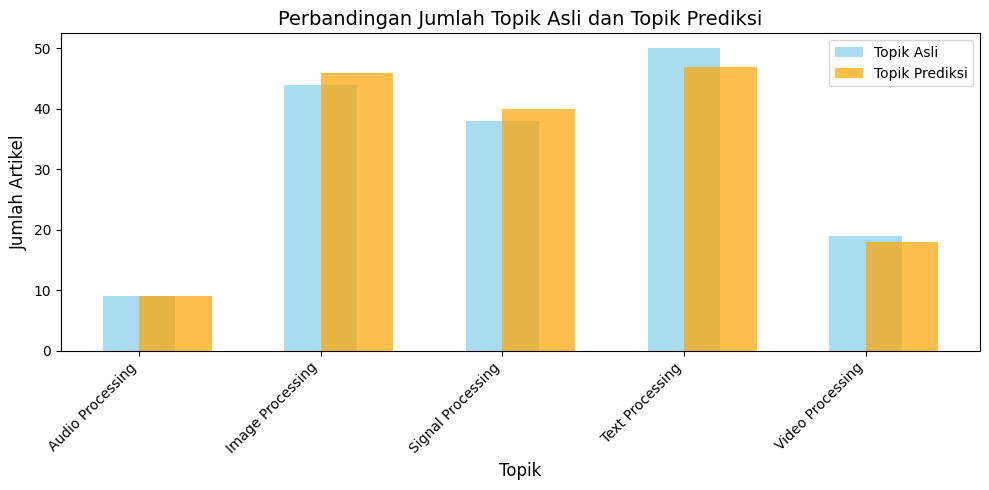

In [ ]:
# PERBANDINGAN DATA TOPIK ASLI VS PREDIKSI

def plot_comparison_of_topics_from_df(df_results):
    true_topic_counts = df_results['True Topic'].value_counts().sort_index()
    predicted_topic_counts = df_results['Predicted Topic'].value_counts().sort_index()

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(true_topic_counts.index, true_topic_counts.values, width=0.4, label='Topik Asli', align='center', alpha=0.7, color='skyblue')
    ax.bar(predicted_topic_counts.index, predicted_topic_counts.values, width=0.4, label='Topik Prediksi', align='edge', alpha=0.7, color='orange')

    ax.set_title("Perbandingan Jumlah Topik Asli dan Topik Prediksi", fontsize=14)
    ax.set_xlabel("Topik", fontsize=12)
    ax.set_ylabel("Jumlah Artikel", fontsize=12)
    ax.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_comparison_of_topics_from_df(df_results)


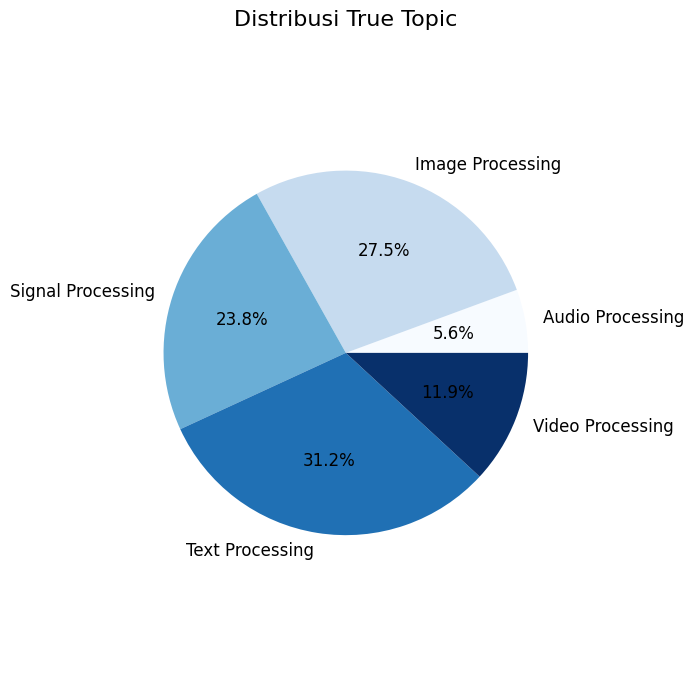

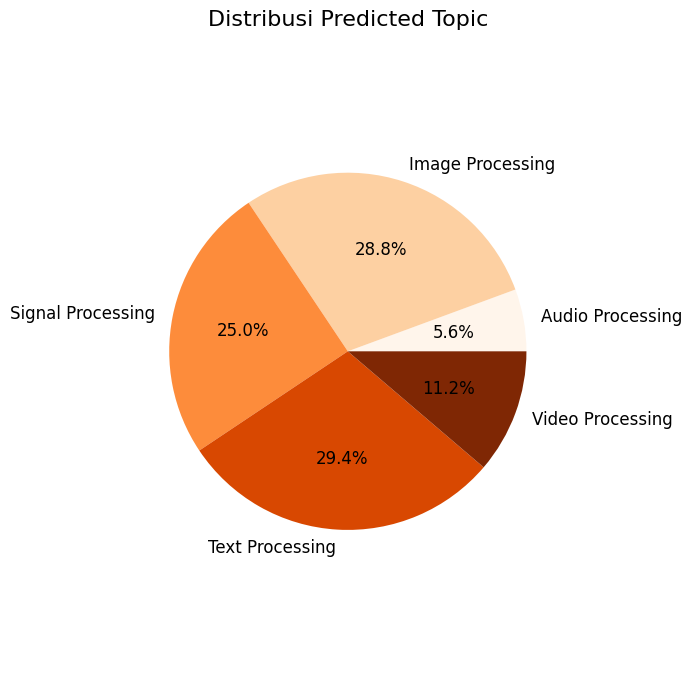

In [64]:
# LIHAT TREN TOPIK DARI TAHUN 2019-2024 BERDASARKAN DATA TOPIK ASLI DAN DATA TOPIK PREDIKSI

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Hitung distribusi "True Topic" dan "Predicted Topic"
true_topic_counts = df_results['True Topic'].value_counts().sort_index()
predicted_topic_counts = df_results['Predicted Topic'].value_counts().sort_index()

def visualize_topics(true_topic_counts, predicted_topic_counts):
    plt.figure(figsize=(7, 7))
    plt.pie(
        true_topic_counts,
        labels=true_topic_counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 12},
        colors=plt.cm.Blues(np.linspace(0, 1, len(true_topic_counts)))
    )
    plt.title('Distribusi True Topic', fontsize=16)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 7))
    plt.pie(
        predicted_topic_counts,
        labels=predicted_topic_counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 12},
        colors=plt.cm.Oranges(np.linspace(0, 1, len(predicted_topic_counts)))
    )
    plt.title('Distribusi Predicted Topic', fontsize=16)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

visualize_topics(true_topic_counts, predicted_topic_counts)


In [65]:
# MENGHITUNG TOPIK TIAP TAHUNNYA 

data_tahunan =[]

for base in base_urls:
    topik = base['topik']
    base_url = base['url']

    print(f"\nScraping distribusi artikel berdasarkan tahun untuk topik: {topik}")

    for year in range(2019, 2025): 
        year_url = re.sub(r'dateFrom=\d{4}', f'dateFrom={year}', base_url)
        year_url = re.sub(r'dateTo=\d{4}', f'dateTo={year}', year_url)

        html = requests.get(year_url)
        soup = BeautifulSoup(html.text, "html.parser")

    
        total_results_text = soup.find("span", class_="u-display-flex")
        if total_results_text:
            match = re.search(r'of\s([\d,]+)\sresults', total_results_text.text)
            if match:
                total_results = int(match.group(1).replace(',', ''))
            else:
                total_results = 0
        else:
            total_results = 0

        print(f"Total artikel ditemukan tahun {year}:  {total_results}")
        data_tahunan.append({"Topik": topik, "Tahun": year, "Jumlah": total_results})

df_pertahun = pd.DataFrame(data_tahunan)



Scraping distribusi artikel berdasarkan tahun untuk topik: Audio Processing
Total artikel ditemukan tahun 2019:  2165
Total artikel ditemukan tahun 2020:  2532
Total artikel ditemukan tahun 2021:  3191
Total artikel ditemukan tahun 2022:  3666
Total artikel ditemukan tahun 2023:  4290
Total artikel ditemukan tahun 2024:  5350

Scraping distribusi artikel berdasarkan tahun untuk topik: Video Processing
Total artikel ditemukan tahun 2019:  6644
Total artikel ditemukan tahun 2020:  7922
Total artikel ditemukan tahun 2021:  9540
Total artikel ditemukan tahun 2022:  10840
Total artikel ditemukan tahun 2023:  11878
Total artikel ditemukan tahun 2024:  13930

Scraping distribusi artikel berdasarkan tahun untuk topik: Signal Processing
Total artikel ditemukan tahun 2019:  26586
Total artikel ditemukan tahun 2020:  29375
Total artikel ditemukan tahun 2021:  33802
Total artikel ditemukan tahun 2022:  35952
Total artikel ditemukan tahun 2023:  37832
Total artikel ditemukan tahun 2024:  45430

Sc

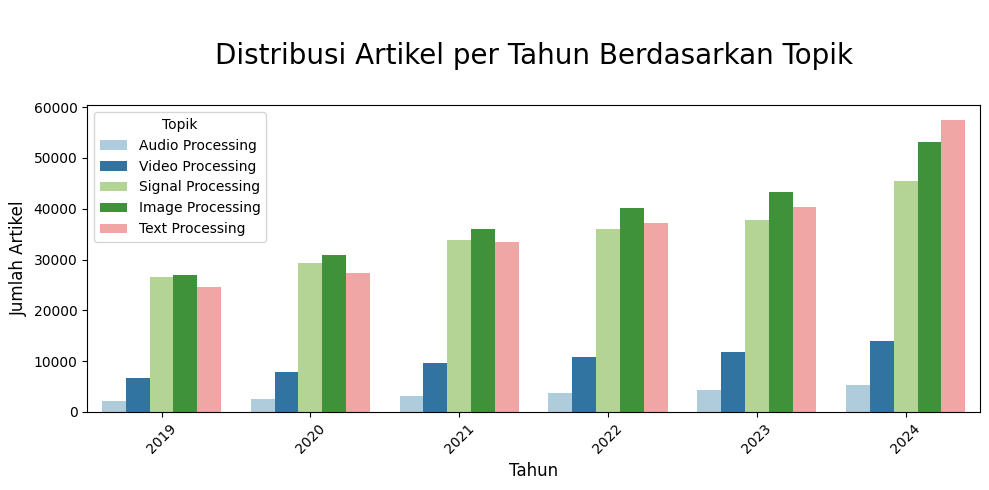

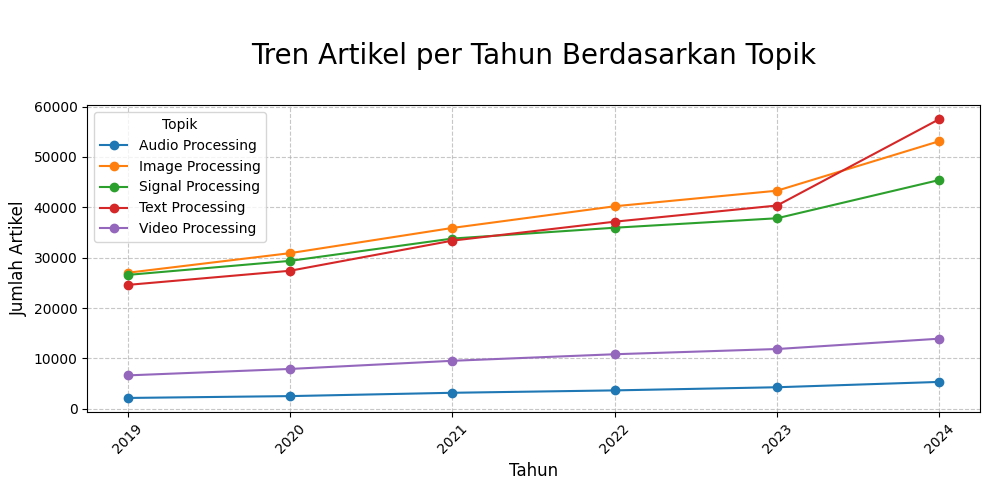

In [74]:
# DISTRIBUSI TOPIK ARTIKEL DALAM TIAP TAHUN

import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
pivot_data = df_pertahun.pivot(index='Tahun', columns='Topik', values='Jumlah').fillna(0)

# Bar Plot: Distribusi Artikel per Tahun Berdasarkan Topik
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_pertahun, 
    x='Tahun', 
    y='Jumlah', 
    hue='Topik', 
    palette='Paired'
)
plt.title('\nDistribusi Artikel per Tahun Berdasarkan Topik\n', fontsize=20)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Artikel', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Topik', fontsize=10)
plt.tight_layout()
plt.show()

# Line Plot: Tren Artikel per Tahun Berdasarkan Topik
plt.figure(figsize=(10, 5))
for topik in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[topik], marker='o', label=topik)

plt.title('\nTren Artikel per Tahun Berdasarkan Topik\n', fontsize=20)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Artikel', fontsize=12)
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Topik', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
